In [14]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
from tools import (
    get_elevation_of_point,
    crawl_path
)

In [2]:
# We combine data from the wiki crawl here, check for incosistencies and todos and export the joint graph and a nice view.

In [3]:
# couple of pages are broken. We can just do them by hand (for some no resolving possible)

additional_wiki_coords = {
    "Stecknitz":(53.845723, 10.651787),
    "Sebnitz (Fluss)": (50.943148, 14.13512),
    "Gundbach":(49.9774, 8.50655),
    "Wilsterau": (53.911475, 9.409622),
    "Sorbitz": (50.632379, 11.179147),
    "Threne": (51.334722, 12.545833),
    "Lossa (Unstrut)": (51.20472460667289, 11.141046705302024),
    "Ohre": (52.310823333333, 11.765274777778),
    "Kleine Röder (Schwarze Elster)": (51.50638609788923, 13.413837336099004)
}

# Combine ground truth graph and identify issues.

In [ ]:
path =crawl_path

# Get river list again for double checks
rivers = pickle.load(open(path + "river_names.p", "rb"))
inv_rivers = {v: k for k, v in rivers.items()}

sink = pickle.load(open(path + "sink_names.p" , "rb"))
inv_sink = {v: k for k, v in sink.items()}

coords= pickle.load(open(path + "end_coordinates_saves_raw.p", "rb"))
sink_coords= pickle.load(open(path + "end_coordinates_sink_saves_raw.p", "rb"))
abfluss = pickle.load(open(path + "abfluss_saves_raw.p", "rb"))


height = pickle.load(open(path + "height_saves_raw.p", "rb"))

In [9]:
len(height)

3724

In [10]:
# Add some handcratfted  features (Crawl bricked).
for x in additional_wiki_coords.keys():
    coords[x] = additional_wiki_coords[x]
    height[x] = get_elevation_of_point(np.array(additional_wiki_coords[x]).astype(str))

In [11]:
# Create graph.

G = nx.DiGraph()

nodes = []
for x in rivers:
    if not coords[x]:
        pass
    else:
        nodes.append((x, {"p": coords[x],"h":height[x]}))
G.add_nodes_from(nodes)
print(len(G.nodes))
edges = []
for x in list(G.nodes):
    if abfluss[x] in inv_rivers: 
        if inv_rivers[abfluss[x]] in list(G.nodes):
            edges.append((x, inv_rivers[abfluss[x]]))

G.add_edges_from(edges)
print(len(G.nodes))

3528
3528


In [12]:
len(rivers)

3724

In [15]:
# save graph
pickle.dump(G, open(crawl_path + 'base_G.pickle', 'wb'))

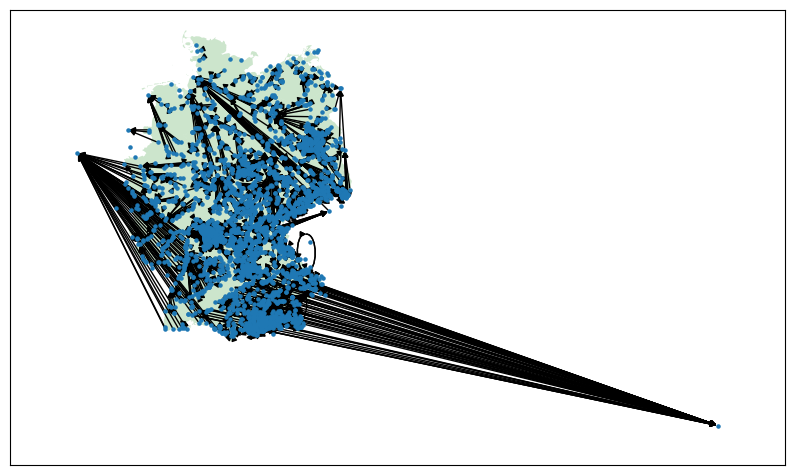

In [16]:
#we can plot the graph (river ends as coords)

pos = {x: np.flip(G.nodes[x]["p"]).astype(float) for x in G.nodes}
fig, ax = plt.subplots(1, 1, figsize=(10,15))
fp = "../visualization/geomaps/vg2500_bld.shp"
map_df = gpd.read_file(fp)
map_df.head()
map_df.plot(color = "green", alpha=0.2, ax=ax)

nx.draw_networkx(G, pos,  with_labels=False, font_size=5, node_size=5, arrows=True, arrowsize=8, ax=ax)
#plt.savefig("savings/base_G.png", dpi= 300)
plt.show()

In [ ]:
# We can also plot it in circle to observe how many nodes are connected

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
nx.draw_networkx(
    G,
    with_labels=True,
    font_size=1,
    node_size=50,
    arrows=True,
    arrowsize=2,
    ax=ax,
    width=1,
    pos=nx.fruchterman_reingold_layout(G),
)

#plt.savefig("savings/base_no_coords.png", dpi=100)
plt.show()

In [8]:
### Height information for displaying later.

In [17]:
# We might try to extend this here with additional sink_nodes and abfluss fixes. For now its fine.